# Exp 5: Linear Regression

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv("/home/parth/Downloads/FML Lab/Dataset/Salary_Data.csv")
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
print("Shape:", dataset.shape)

Shape: (30, 2)


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

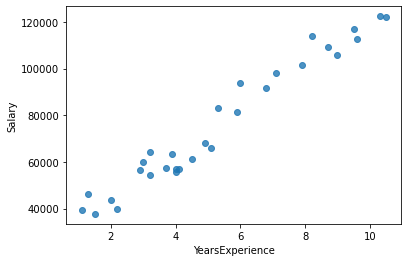

In [7]:
# visualise yearsexperience-Salary relationship
import seaborn as sns
sns.regplot(x="YearsExperience", y="Salary", data=dataset, fit_reg=False)

In [8]:
X = dataset.iloc[:,:-1].values    #independent variable array
Y = dataset.iloc[:,1].values      #dependent variable vector

In [9]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [10]:
Y=Y.reshape(-1,1)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=5)

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [13]:
# predicting the test set results
Y_pred = regressor.predict(X_test)
print(Y_pred)

[[ 64187.4250843 ]
 [124072.91801685]
 [102882.66667149]
 [110253.18887857]
 [ 81692.41532612]
 [ 63266.10980841]
 [ 41154.54318717]
 [ 65108.74036019]
 [114859.765258  ]
 [ 92748.19863675]]


In [14]:
print(Y_test)

[[ 55794.]
 [121872.]
 [113812.]
 [105582.]
 [ 81363.]
 [ 63218.]
 [ 37731.]
 [ 57081.]
 [116969.]
 [ 98273.]]


In [15]:
#Performance matrix
from sklearn import metrics
meanAbErr= metrics.mean_absolute_error(Y_test,Y_pred)
meanSqErr=metrics.mean_squared_error(Y_test,Y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print('R Squared: {:.4f}'.format(regressor.score(X,Y)*100))
print('Mean Absolute Error: ', meanAbErr)
print('Mean Square Error: ', meanSqErr)
print('Root Mean Square Error: ', rootMeanSqErr)

R Squared: 95.6244
Mean Absolute Error:  4565.771009537716
Mean Square Error:  32781235.08636551
Root Mean Square Error:  5725.489942910171


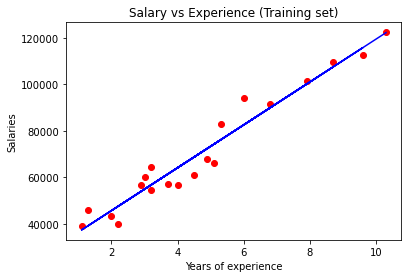

In [16]:
plt.scatter(X_train, Y_train, color='red') 
plt.plot(X_train, regressor.predict(X_train), color='blue') 
plt.title("Salary vs Experience (Training set)") 
plt.xlabel("Years of experience") 
plt.ylabel("Salaries")
plt.show() 

# Improving model using cross validation

In [17]:
# split into train and test
df_train, df_test = train_test_split(dataset, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 10)
print(len(df_train))
print(len(df_test))

21
9


In [18]:
# split into X and y for both train and test sets
# reshaping is required since sklearn requires the data to be in shape
# (n, 1), not as a series of shape (n, )
X_train = df_train['YearsExperience']
X_train = X_train.values.reshape(-1, 1)
y_train = df_train['Salary']

X_test = df_test['YearsExperience']
X_test = X_test.values.reshape(-1, 1)
y_test = df_test['Salary']

In [19]:
from sklearn.model_selection import cross_val_score
regressor = LinearRegression()

scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=5)
scores

array([0.78267432, 0.91954995, 0.99371226, 0.80190335, 0.69985126])

In [20]:
# Using Kfold CV
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=folds)
scores  

array([0.94349865, 0.85428806, 0.95087297, 0.91044645, 0.95614618])

##### Note: A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called grid search cross-validation.

# Rescaling the data

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [22]:
rescaledX = scaler.fit_transform(X)
print(rescaledX)

[[0.        ]
 [0.0212766 ]
 [0.04255319]
 [0.09574468]
 [0.11702128]
 [0.19148936]
 [0.20212766]
 [0.22340426]
 [0.22340426]
 [0.27659574]
 [0.29787234]
 [0.30851064]
 [0.30851064]
 [0.31914894]
 [0.36170213]
 [0.40425532]
 [0.42553191]
 [0.44680851]
 [0.5106383 ]
 [0.5212766 ]
 [0.60638298]
 [0.63829787]
 [0.72340426]
 [0.75531915]
 [0.80851064]
 [0.84042553]
 [0.89361702]
 [0.90425532]
 [0.9787234 ]
 [1.        ]]


In [23]:
rescaledY = scaler.fit_transform(Y)
print(rescaledY)

[[0.01904087]
 [0.1000945 ]
 [0.        ]
 [0.06843846]
 [0.02551382]
 [0.22337586]
 [0.26481219]
 [0.19742499]
 [0.31554453]
 [0.229837  ]
 [0.30105126]
 [0.21335932]
 [0.22709662]
 [0.2285613 ]
 [0.27616348]
 [0.35680369]
 [0.33425467]
 [0.53575478]
 [0.51537916]
 [0.66393811]
 [0.63792818]
 [0.7151193 ]
 [0.75089771]
 [0.89866525]
 [0.84691708]
 [0.80145287]
 [0.93595559]
 [0.88476258]
 [1.        ]
 [0.9938696 ]]


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(rescaledX,rescaledY,test_size=1/3,random_state=5)

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [26]:
# predicting the test set results
Y_pred = regressor.predict(X_test)
print(Y_pred)

[[0.31250207]
 [1.01986674]
 [0.76956847]
 [0.85662874]
 [0.5192702 ]
 [0.30161953]
 [0.04043873]
 [0.3233846 ]
 [0.9110414 ]
 [0.6498606 ]]


In [27]:
print(Y_test)

[[0.21335932]
 [0.9938696 ]
 [0.89866525]
 [0.80145287]
 [0.51537916]
 [0.30105126]
 [0.        ]
 [0.2285613 ]
 [0.93595559]
 [0.7151193 ]]


In [28]:
#Performance matrix
from sklearn import metrics
meanAbErr= metrics.mean_absolute_error(Y_test,Y_pred)
meanSqErr=metrics.mean_squared_error(Y_test,Y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print('R Squared: {:.4f}'.format(regressor.score(rescaledX,rescaledY)*100))
print('Mean Absolute Error: ', meanAbErr)
print('Mean Square Error: ', meanSqErr)
print('Root Mean Square Error: ', rootMeanSqErr)

R Squared: 95.6244
Mean Absolute Error:  0.05393067575641055
Mean Square Error:  0.0045737116817299835
Root Mean Square Error:  0.06762922209910434


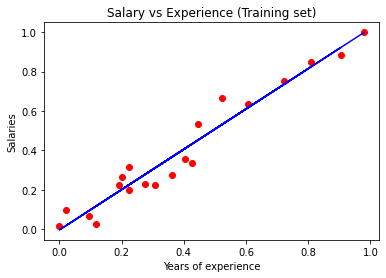

In [29]:
plt.scatter(X_train, Y_train, color='red') 
plt.plot(X_train, regressor.predict(X_train), color='blue') 
plt.title("Salary vs Experience (Training set)") 
plt.xlabel("Years of experience") 
plt.ylabel("Salaries")
plt.show() 

# Standardisation of data

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler().fit(X)
rescaleX = scaler.transform(X)
print(rescaleX)

[[-1.51005294]
 [-1.43837321]
 [-1.36669348]
 [-1.18749416]
 [-1.11581443]
 [-0.86493538]
 [-0.82909552]
 [-0.75741579]
 [-0.75741579]
 [-0.57821647]
 [-0.50653674]
 [-0.47069688]
 [-0.47069688]
 [-0.43485702]
 [-0.29149756]
 [-0.1481381 ]
 [-0.07645838]
 [-0.00477865]
 [ 0.21026054]
 [ 0.2461004 ]
 [ 0.53281931]
 [ 0.6403389 ]
 [ 0.92705781]
 [ 1.03457741]
 [ 1.21377673]
 [ 1.32129632]
 [ 1.50049564]
 [ 1.5363355 ]
 [ 1.78721455]
 [ 1.85889428]]


In [32]:
scaler = StandardScaler().fit(Y)
rescaleY = scaler.transform(Y)
print(rescaleY)

[[-1.36011263]
 [-1.10552744]
 [-1.419919  ]
 [-1.20495739]
 [-1.33978143]
 [-0.71830716]
 [-0.58815781]
 [-0.79981746]
 [-0.42881019]
 [-0.69801306]
 [-0.47433279]
 [-0.74976858]
 [-0.70662043]
 [-0.70201994]
 [-0.55250402]
 [-0.29921736]
 [-0.37004264]
 [ 0.26285865]
 [ 0.19885989]
 [ 0.66547573]
 [ 0.58377993]
 [ 0.82623317]
 [ 0.93861127]
 [ 1.40274136]
 [ 1.24020308]
 [ 1.09740238]
 [ 1.51986835]
 [ 1.3590738 ]
 [ 1.72102849]
 [ 1.70177321]]


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(rescaleX,rescaleY,test_size=1/3,random_state=5)

In [34]:
# predicting the test set results
Y_pred = regressor.predict(X_test)
print(Y_pred)

[[-0.4845946 ]
 [ 1.89847963]
 [ 1.05523798]
 [ 1.34853942]
 [ 0.21199633]
 [-0.52125728]
 [-1.40116162]
 [-0.44793192]
 [ 1.53185282]
 [ 0.65194849]]


In [35]:
print(Y_test)

[[-0.74976858]
 [ 1.70177321]
 [ 1.40274136]
 [ 1.09740238]
 [ 0.19885989]
 [-0.47433279]
 [-1.419919  ]
 [-0.70201994]
 [ 1.51986835]
 [ 0.82623317]]


In [36]:
#Performance matrix
from sklearn import metrics
meanAbErr= metrics.mean_absolute_error(Y_test,Y_pred)
meanSqErr=metrics.mean_squared_error(Y_test,Y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print('R Squared: {:.4f}'.format(regressor.score(rescaleX,rescaleY)*100))
print('Mean Absolute Error: ', meanAbErr)
print('Mean Square Error: ', meanSqErr)
print('Root Mean Square Error: ', rootMeanSqErr)

R Squared: 95.4948
Mean Absolute Error:  0.15796962943264153
Mean Square Error:  0.03906448764564778
Root Mean Square Error:  0.19764738208650218


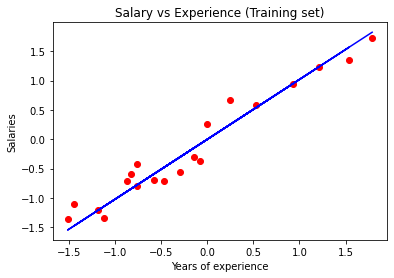

In [37]:
plt.scatter(X_train, Y_train, color='red') 
plt.plot(X_train, regressor.predict(X_train), color='blue') 
plt.title("Salary vs Experience (Training set)") 
plt.xlabel("Years of experience") 
plt.ylabel("Salaries")
plt.show() 

# Normalisation of data

In [38]:
from sklearn.preprocessing import Normalizer

In [39]:
normalizer = Normalizer().fit(X)
Xnorm= normalizer.transform(X)
print(Xnorm)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [40]:
Y_normalizer = Normalizer().fit(Y)
Ynorm= Y_normalizer.transform(Y)
print(Ynorm)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(Xnorm,Ynorm,test_size=1/3,random_state=5)

In [42]:
print(X_train.shape)
print(Y_train.shape)

(20, 1)
(20, 1)


In [43]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [44]:
# predicting the test set results
Y_pred = regressor.predict(X_test)
print(Y_pred)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [45]:
print(Y_test)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [46]:
#Performance matrix
from sklearn import metrics
meanAbErr= metrics.mean_absolute_error(Y_test,Y_pred)
meanSqErr=metrics.mean_squared_error(Y_test,Y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print('R Squared: {:.4f}'.format(regressor.score(Xnorm,Ynorm)*100))
print('Mean Absolute Error: ', meanAbErr)
print('Mean Square Error: ', meanSqErr)
print('Root Mean Square Error: ', rootMeanSqErr)

R Squared: 100.0000
Mean Absolute Error:  0.0
Mean Square Error:  0.0
Root Mean Square Error:  0.0


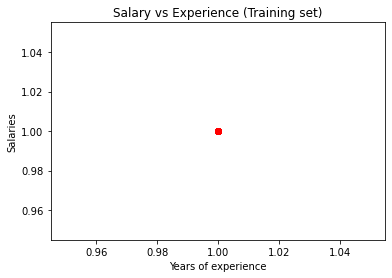

In [47]:
plt.scatter(X_train, Y_train, color='red') 
plt.plot(X_train, regressor.predict(X_train), color='blue') 
plt.title("Salary vs Experience (Training set)") 
plt.xlabel("Years of experience") 
plt.ylabel("Salaries")
plt.show() 

# Binary Data Transformation

In [48]:
from sklearn.preprocessing import Binarizer

In [49]:
binarizer = Binarizer(threshold=500).fit(X)
binaryX = binarizer.transform(X)
print(binaryX)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [50]:
binarizer = Binarizer(threshold=100).fit(Y)
binaryY = binarizer.transform(Y)
print(binaryY)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(binaryX, binaryY, test_size=1/3, random_state=10)

In [52]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [53]:
# predicting the test set results
Y_pred = regressor.predict(X_test)
print(Y_pred)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [54]:
print(Y_test)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [55]:
#Performance matrix
from sklearn import metrics
meanAbErr= metrics.mean_absolute_error(Y_test,Y_pred)
meanSqErr=metrics.mean_squared_error(Y_test,Y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print('R Squared: {:.4f}'.format(regressor.score(binaryX,binaryY)*100))
print('Mean Absolute Error: ', meanAbErr)
print('Mean Square Error: ', meanSqErr)
print('Root Mean Square Error: ', rootMeanSqErr)

R Squared: 100.0000
Mean Absolute Error:  0.0
Mean Square Error:  0.0
Root Mean Square Error:  0.0


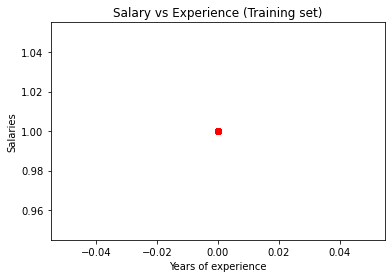

In [56]:
plt.scatter(X_train, Y_train, color='red') 
plt.plot(X_train, regressor.predict(X_train), color='blue') 
plt.title("Salary vs Experience (Training set)") 
plt.xlabel("Years of experience") 
plt.ylabel("Salaries")
plt.show() 

## Hence, MinMax Scalar and CV is found to be the best data transformation algorithm to optimize the model prediction by minimizing losses.